In [1]:
# Load the necessary libraries
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
from matplotlib import ticker
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.manifold import MDS
from sklearn.utils import shuffle
from sklearn.datasets import load_digits

In [2]:
# Load the digits data
digits = load_digits()
X = pd.DataFrame(digits.data) / 255
y = digits.target

In [3]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [4]:
# Build a PCA model with 2 components and fit to training data
pca = PCA(n_components=2, random_state=123)
X_transformed = pca.fit_transform(X_train)

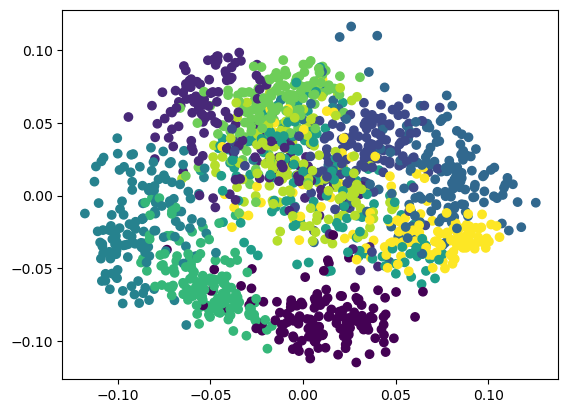

In [5]:
# Plot the PCA mapping
fig, plot = plt.subplots()
plt.prism()
plot.scatter(X_transformed[:, 0], X_transformed[:, 1], c=np.ravel(y_train), cmap='viridis')

In [6]:
# Build an MDS model and fit to training data
mds = MDS(n_components=2, random_state=123, normalized_stress='auto')
X_transform_mds = mds.fit_transform(X_train)

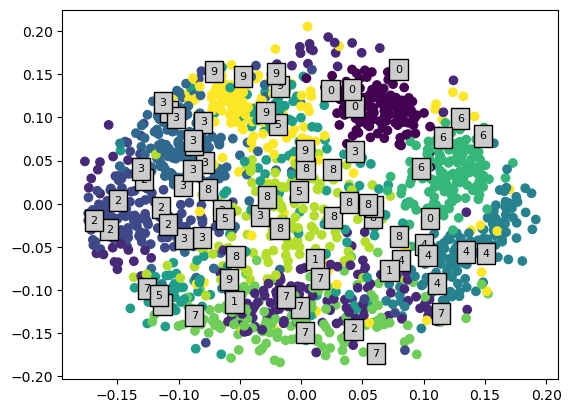

In [7]:
# Plot the MDS mapping
fig, plot = plt.subplots()
plt.prism()
plot.scatter(X_transform_mds[:, 0], X_transform_mds[:, 1], c=np.ravel(y_train), cmap='viridis')
count=0
for label , x, y in zip(y_train, X_transform_mds[:, 0], X_transform_mds[:, 1]):
    if count % 20 == 0:
        plt.annotate(str(int(label)),xy=(x,y), color='black', size=8,bbox=dict(boxstyle='square,pad=0.5', fc='0.8'))
    count = count + 1

In [8]:
# Display the data points in lower-dimensional space
pd.DataFrame(mds.embedding_)

,0,1
0,0.055577,-0.019347
1,0.170184,0.016589
2,-0.097003,0.122933
3,-0.127081,0.004391
4,0.053076,-0.140444
...,...,...
1432,0.131191,0.049749
1433,-0.072225,0.028008
1434,-0.051683,0.109589
1435,0.059925,-0.036859


In [9]:
# Display the dissimilarity matrix in the higher-dimensional space
pd.DataFrame(mds.dissimilarity_matrix_)

,0,1,2,3,4,5,6,7,8,9,...,1427,1428,1429,1430,1431,1432,1433,1434,1435,1436
0,0.000000,0.175071,0.199114,0.193711,0.167988,0.190307,0.201456,0.225209,0.193513,0.168125,...,0.165498,0.153543,0.110223,0.174367,0.148140,0.185810,0.149226,0.180648,0.178421,0.198495
1,0.175071,0.000000,0.229303,0.238572,0.171297,0.206916,0.197952,0.251072,0.206842,0.097093,...,0.201799,0.209721,0.179580,0.242694,0.198107,0.222460,0.212743,0.183477,0.199307,0.199846
2,0.199114,0.229303,0.000000,0.176340,0.217532,0.205537,0.213537,0.244147,0.201913,0.219888,...,0.225311,0.243485,0.192836,0.171521,0.223736,0.202673,0.136299,0.149329,0.228194,0.119205
3,0.193711,0.238572,0.176340,0.000000,0.218731,0.177427,0.226468,0.215222,0.182553,0.229671,...,0.194780,0.194622,0.203090,0.112228,0.197913,0.198224,0.160736,0.198417,0.182427,0.184772
4,0.167988,0.171297,0.217532,0.218731,0.000000,0.194662,0.117123,0.224079,0.186099,0.170532,...,0.181158,0.229470,0.148140,0.218696,0.179794,0.224388,0.179066,0.184147,0.176558,0.212815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1432,0.185810,0.222460,0.202673,0.198224,0.224388,0.218696,0.240018,0.216185,0.219398,0.241519,...,0.186264,0.172638,0.195332,0.196861,0.205200,0.000000,0.209391,0.215686,0.160593,0.214184
1433,0.149226,0.212743,0.136299,0.160736,0.179066,0.181624,0.196509,0.225754,0.166239,0.196314,...,0.170080,0.206953,0.123265,0.155435,0.172415,0.209391,0.000000,0.142478,0.171655,0.144194
1434,0.180648,0.183477,0.149329,0.198417,0.184147,0.169718,0.198146,0.198650,0.177427,0.196861,...,0.184147,0.225038,0.178075,0.202065,0.215971,0.215686,0.142478,0.000000,0.182427,0.104787
1435,0.178421,0.199307,0.228194,0.182427,0.176558,0.192716,0.217815,0.179965,0.195961,0.212707,...,0.115603,0.171162,0.171835,0.207473,0.185478,0.160593,0.171655,0.182427,0.000000,0.206842


In [10]:
# Display the raw stress
mds.stress_

4108.461876575267

In [11]:
# Display the number of iterations that give the best stress
mds.n_iter_

296